<h1 align="center">Volume 1: Facial Recognition.</h1>

    <Name> (Broderik Craig)
    <Section 003>
    <11/19/21>

In [1]:
import os
import numpy as np
from imageio import imread
from matplotlib import pyplot as plt
from scipy import linalg as la

### Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [3]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """

    new_image = image.reshape(m,n)
    
    plt.imshow(new_image, cmap = 'gray')

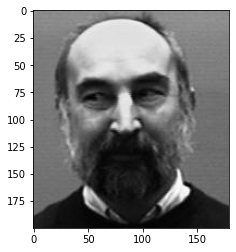

In [8]:
show(face.F[:,134])

In [31]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        self.F = get_faces(path)            #original matrix
        self.mu = np.mean(self.F, axis = 1) #average across the columns
        self.Fbar = (self.F.T-self.mu).T    #F shifted by mu
        self.U = la.svd(self.Fbar, full_matrices = False)[0]  #U of the svd of Fbar
        
    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        
        return self.U[:,:s].T @ A
        

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        gbar = g - self.mu.T   #shift g by mu
        ghat = self.project(gbar, s) #project gbar onto U_s
        Fhat = self.project(self.Fbar, s) #project Fbar onto U_s
        j = np.argmin([la.norm(Fhat[:,i] - ghat) for i in range(Fhat.shape[1])]) #iterate through the norm between ghat and
                                                                                 #each column of Fhat
        return j
        
    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        
        j = self.find_nearest(image, s)
        
        ax1 = plt.subplot(121)
        show(image)
        plt.axis('off')
        print(j)
        
        ax2 = plt.subplot(122)
        show(self.F[:,j])
        plt.axis('off')
        
        plt.show()

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

In [32]:
face = FacialRec()

In [9]:
face.project(face.F[:,1:4],6).shape

(6, 3)

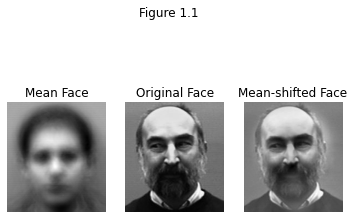

In [38]:
i = 134
ax1 = plt.subplot(132)
show(face.F[:,i])
ax1.axis('off')
plt.title("Original Face")

ax2 = plt.subplot(131)
show(face.mu)
ax2.axis('off')
plt.title("Mean Face")

ax3 = plt.subplot(133)
show(face.Fbar[:,i])
plt.title('Mean-shifted Face')
plt.axis('off')
plt.suptitle('Figure 1.1', verticalalignment = 'bottom')

plt.show()

### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


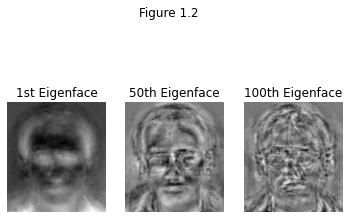

In [40]:
ax1 = plt.subplot(131)
show(face.U[:,0])
ax1.axis('off')
plt.title("1st Eigenface")
ax2 = plt.subplot(132)
show(face.U[:,50])
ax2.axis('off')
plt.title("50th Eigenface")
ax3 = plt.subplot(133)
show(face.U[:,99])
plt.title('100th Eigenface')
plt.axis('off')
plt.suptitle('Figure 1.2', verticalalignment = 'bottom')
plt.show()

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

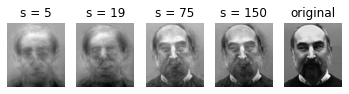

In [42]:
S = [5, 19, 75, 150, 0]

for s in S:
    if s == 5:
        ax1 = plt.subplot(151)
        ftilde = face.U[:,:s] @ face.project(face.F[:,134],s)
        show(ftilde + face.mu)
        plt.axis('off')
        plt.title('s = 5')
        
    if s == 19:
        ax2 = plt.subplot(152)
        ftilde = face.U[:,:s] @ face.project(face.F[:,134],s)
        show(ftilde + face.mu)
        plt.axis('off')
        plt.title('s = 19')
        
    if s == 75:
        ax3 = plt.subplot(153)
        ftilde = face.U[:,:s] @ face.project(face.F[:,134],s)
        show(ftilde + face.mu)
        plt.axis('off')
        plt.title('s = 75')
        
    if s == 150:
        ax5 = plt.subplot(154)
        ftilde = face.U[:,:s] @ face.project(face.F[:,134],s)
        show(ftilde + face.mu)
        plt.axis('off')
        plt.title('s = 150')
        
    if s == 0:
        ax4 = plt.subplot(155)
        show(face.F[:,134])
        plt.axis('off')
        plt.title('original')

plt.show()

### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

34


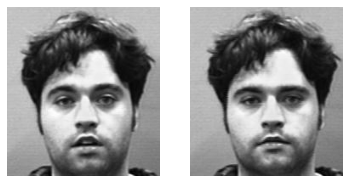

47


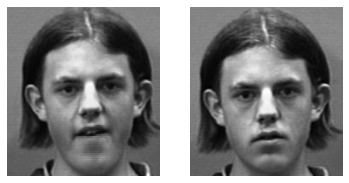

24


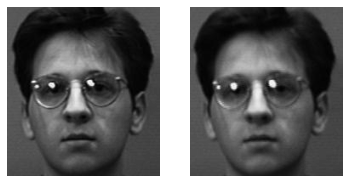

67


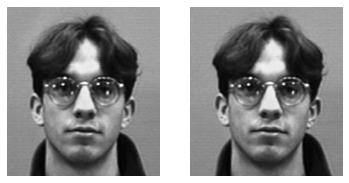

In [37]:
for image in sample_faces(4):
    face.match(image)